# IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from faker import Faker
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATA

In [2]:
data=pd.read_excel("palm data cluster.xlsx")

In [14]:
data

,Division,Block,Area,Empty Fruit Brunch,Achievement Percentage,Average Production Yield
0,1,1.A,3,810,0.8412,1086.666667
1,1,1.B,2,569,0.7194,1000.000000
2,1,1.C,2,545,0.8307,1070.000000
3,1,1.D,2,480,0.7500,600.000000
4,1,1.E,2,465,0.5897,590.000000
5,1,1.F,2,486,0.5921,675.000000
6,1,1.G,2,520,0.8837,950.000000
7,1,1.H,2,578,0.7706,1075.000000
8,1,1.I,2,563,0.7505,945.000000
9,2,2.A,2,421,0.7936,750.000000


In [4]:
data.describe()

,Division,Area,Empty Fruit Brunch,Achievement Percentage,Average Production Yield
count,16.000000,16.0000,16.000000,16.000000,16.000000
mean,1.437500,2.0625,490.687500,0.762713,819.166667
std,0.512348,0.2500,118.790414,0.099353,187.358836
min,1.000000,2.0000,280.000000,0.589700,550.000000
25%,1.000000,2.0000,444.500000,0.712175,665.000000
50%,1.000000,2.0000,480.000000,0.760550,810.000000
75%,2.000000,2.0000,549.500000,0.841600,962.500000
max,2.000000,3.0000,810.000000,0.924300,1086.666667


# DATA MANIPULATION

Adding the observation to 300

In [5]:
fake=Faker()

In [6]:
add_samples=300

In [7]:
rng = np.random.default_rng()

In [8]:
add_data={
    'Division' : [fake.random_int(min=1, max=3) for _ in range(add_samples)],
    'Block' : [fake.name() for _ in range(add_samples)]
    #'Area' : [fake.random_int(min=1, max=3) for _ in range(add_samples)]
}

In [9]:
#Area = np.rint(rng.normal(loc=2.0625, scale=1, size=300)).astype(int)
Area = np.abs(np.random.normal(loc=2, scale=1, size=300))
Empty_Fruit_Brunch = np.rint(rng.normal(loc=490, scale=118, size=300)).astype(int)
Average_Production_Yield = np.random.normal(loc=819.166667, scale=187.358836, size=300)
Achievement_Percentage = np.random.normal(loc=0.762713, scale=0.099353, size=300)

In [10]:
additional=pd.DataFrame({
    'Division' : add_data['Division'],
    'Block' : add_data['Block'],
    #'Area' : add_data['Area'],
    'Area' : Area,
    'Empty Fruit Brunch' : Empty_Fruit_Brunch,
    'Average Production Yield' : Average_Production_Yield,
    'Achievement Percentage' : Achievement_Percentage
})

In [11]:
additional.head()

,Division,Block,Area,Empty Fruit Brunch,Average Production Yield,Achievement Percentage
0,2,Cynthia Hernandez,0.754682,583,726.924988,0.677609
1,1,Connie Greene,2.837376,304,894.393964,0.960015
2,2,Francis Cooke,1.625012,386,982.508618,0.713183
3,1,Andrea Gordon,4.183563,359,894.406581,0.580162
4,1,Briana Brown,0.596427,461,665.519999,0.736518


In [12]:
df= pd.concat([data, pd.DataFrame(additional)], ignore_index=True)

In [15]:
df.head()

,Division,Block,Area,Empty Fruit Brunch,Achievement Percentage,Average Production Yield
0,1,1.A,3.0,810,0.8412,1086.666667
1,1,1.B,2.0,569,0.7194,1000.000000
2,1,1.C,2.0,545,0.8307,1070.000000
3,1,1.D,2.0,480,0.7500,600.000000
4,1,1.E,2.0,465,0.5897,590.000000


In [16]:
df.describe()

,Division,Area,Empty Fruit Brunch,Achievement Percentage,Average Production Yield
count,316.000000,316.000000,316.000000,316.000000,316.000000
mean,1.898734,1.999932,486.237342,0.762446,817.501532
std,0.810172,0.941161,118.323839,0.099753,188.794213
min,1.000000,0.001468,214.000000,0.477326,261.724224
25%,1.000000,1.426145,406.750000,0.700315,692.586641
50%,2.000000,2.000000,480.000000,0.761842,815.220163
75%,3.000000,2.604654,573.250000,0.837402,958.379076
max,3.000000,5.274350,810.000000,1.089233,1324.055355


# DATA CLEANING

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Division                    0
Block                       0
Area                        0
Empty Fruit Brunch          0
Achievement Percentage      0
Average Production Yield    0
dtype: int64

In [19]:
df_run=df.drop(['Division', 'Block'], axis=1)

# EDA

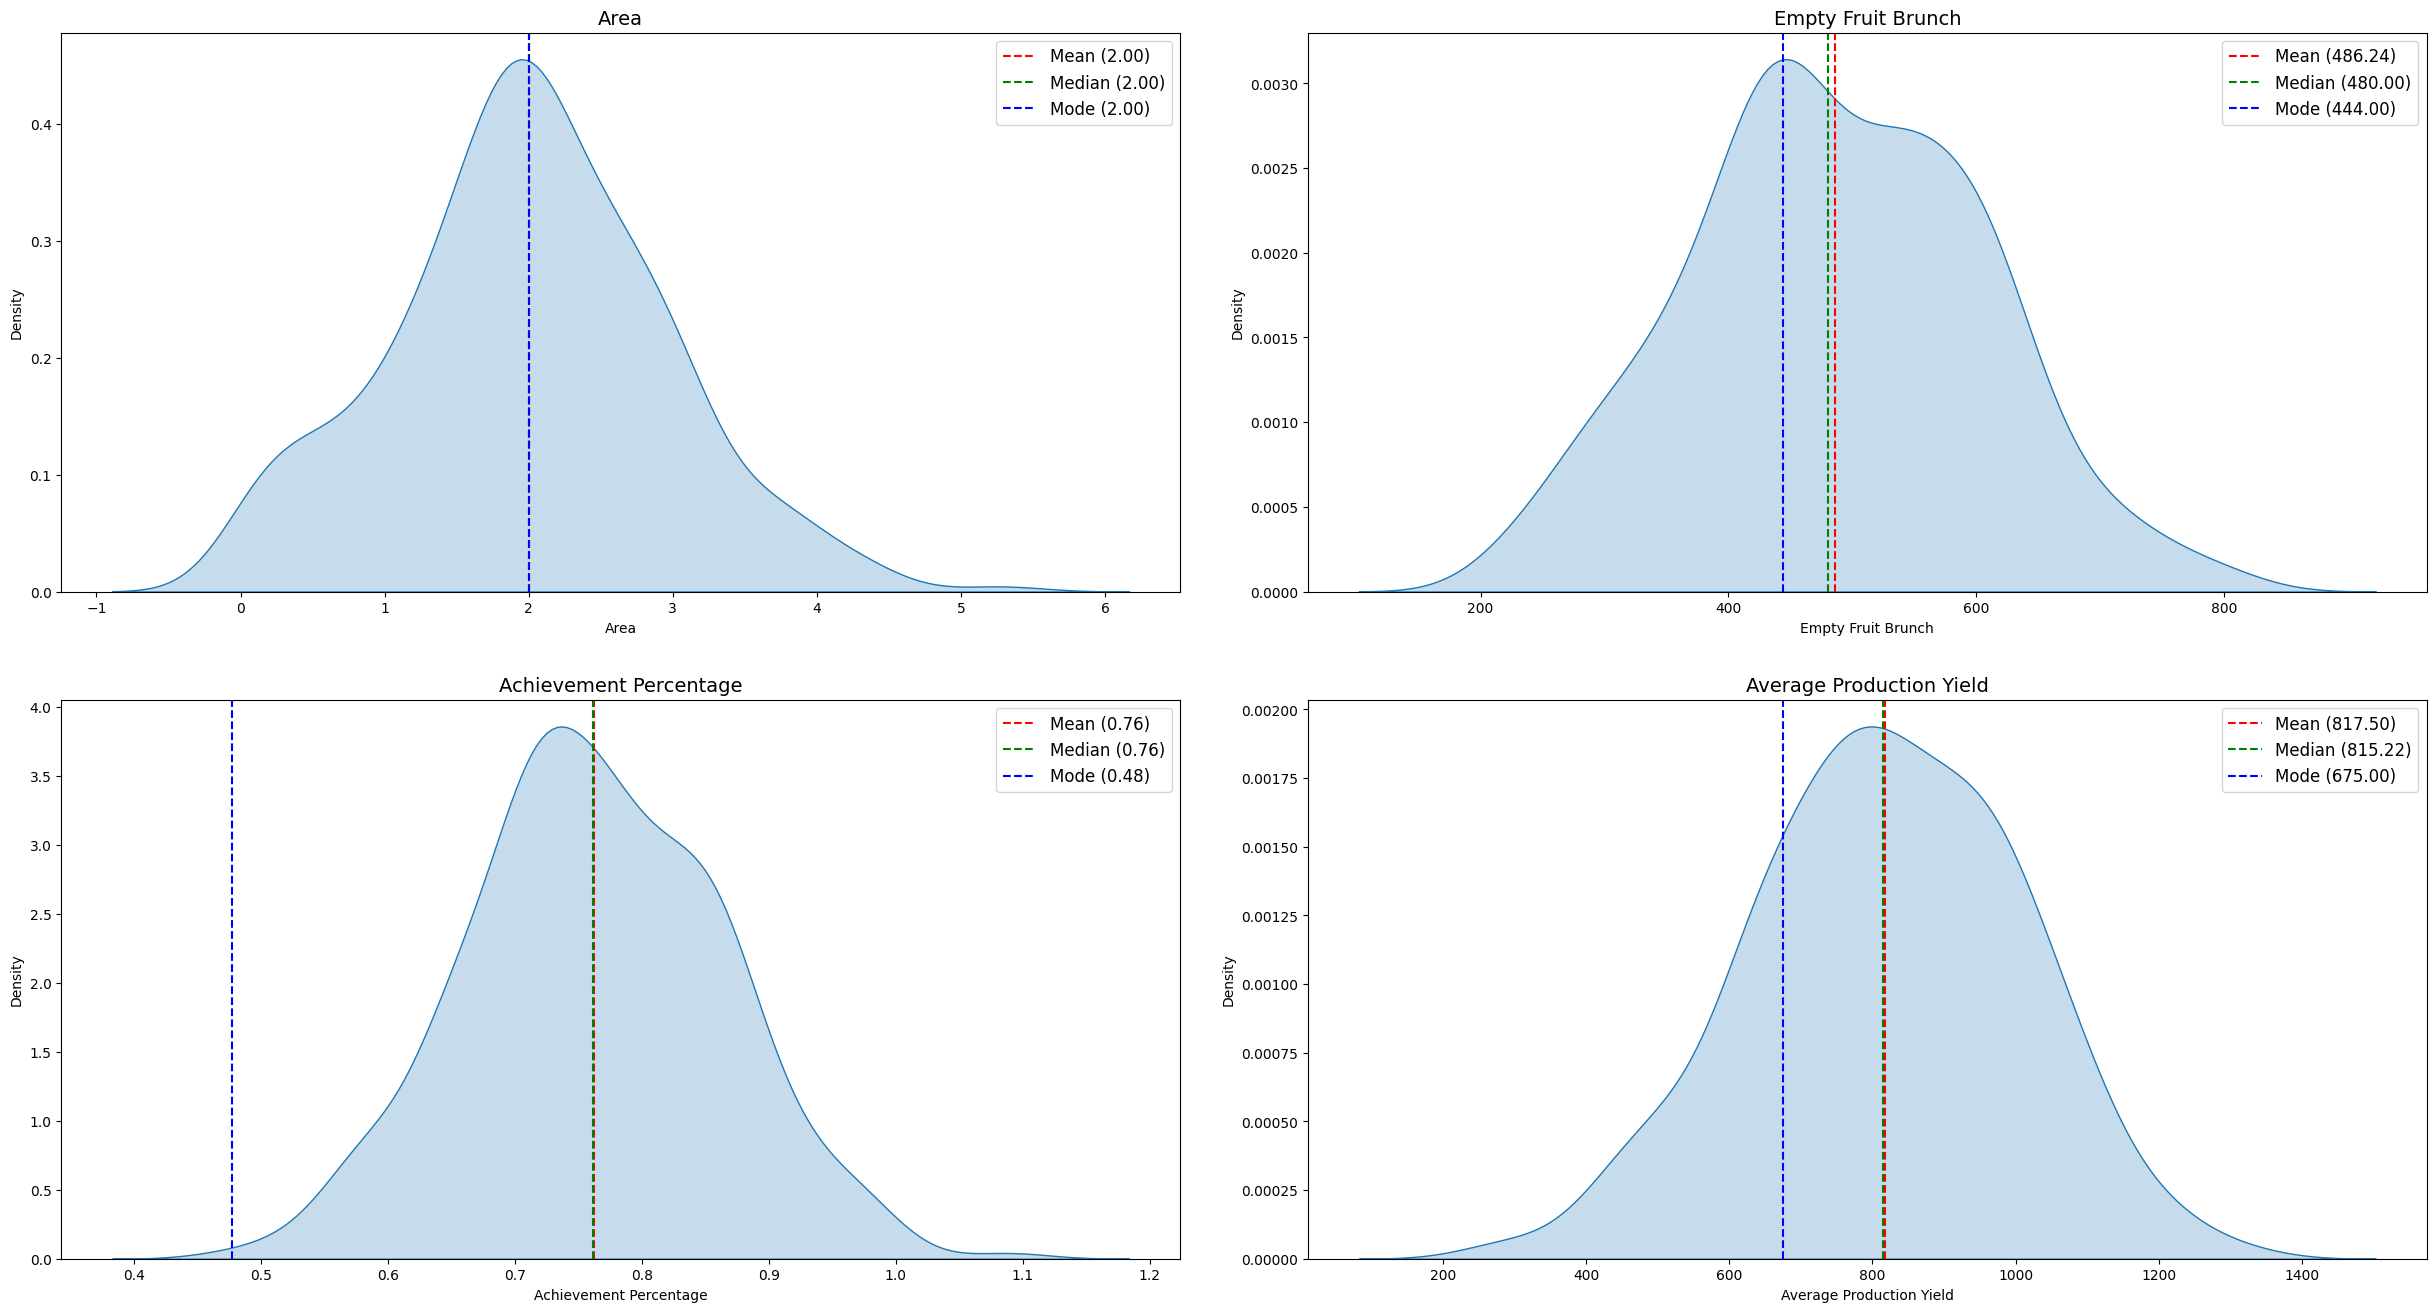

In [20]:
# Setting the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Calculating the total number of subplots
total_subplots = num_rows * num_cols

# Adjusting the figure size
plt.figure(figsize=(25, 20))

# Initializing the subplot index
subplot_index = 1

# Looping through each column to visualize the data distribution
for col in df_run.columns:
    if df_run[col].dtype != 'object':
        # Creating a subplot
        plt.subplot(num_rows, num_cols, subplot_index)
        
        # Using kdeplot to visualize the distribution
        ax = sns.kdeplot(df_run[col], shade=True)
        
        # Calculating mean, median, and mode
        mean_val = df_run[col].mean()
        median_val = df_run[col].median()
        mode_val = stats.mode(df[col])[0]
        
        # Adding lines for mean, median, and mode
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.axvline(mode_val, color='blue', linestyle='--', label=f'Mode ({mode_val:.2f})')
        
        # Setting the title
        ax.set_title(col, fontsize=14)
        
        # Adding a legend
        plt.legend(fontsize=12)
        
        # Incrementing the subplot index
        subplot_index += 1

# Adjusting the layout of subplots for better readability
plt.tight_layout(pad=3.0)

# Showing the plot
plt.show()

<Axes: xlabel='Empty Fruit Brunch', ylabel='Achievement Percentage'>

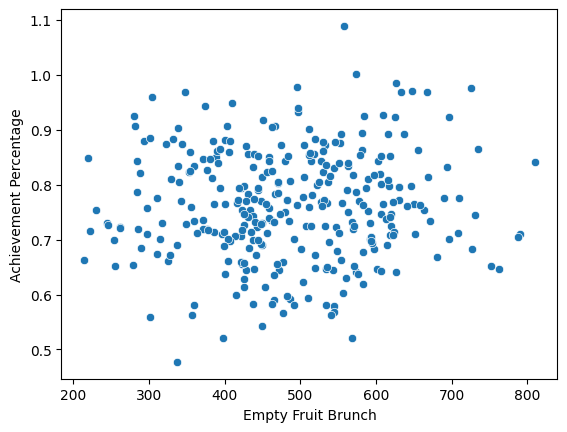

In [21]:
sns.scatterplot(x=df_run['Empty Fruit Brunch'], y=df_run['Achievement Percentage'])

# DATA PREPROCESSING

In [22]:
X = pd.DataFrame(StandardScaler().fit_transform(df_run), 
                        columns=df_run.columns)

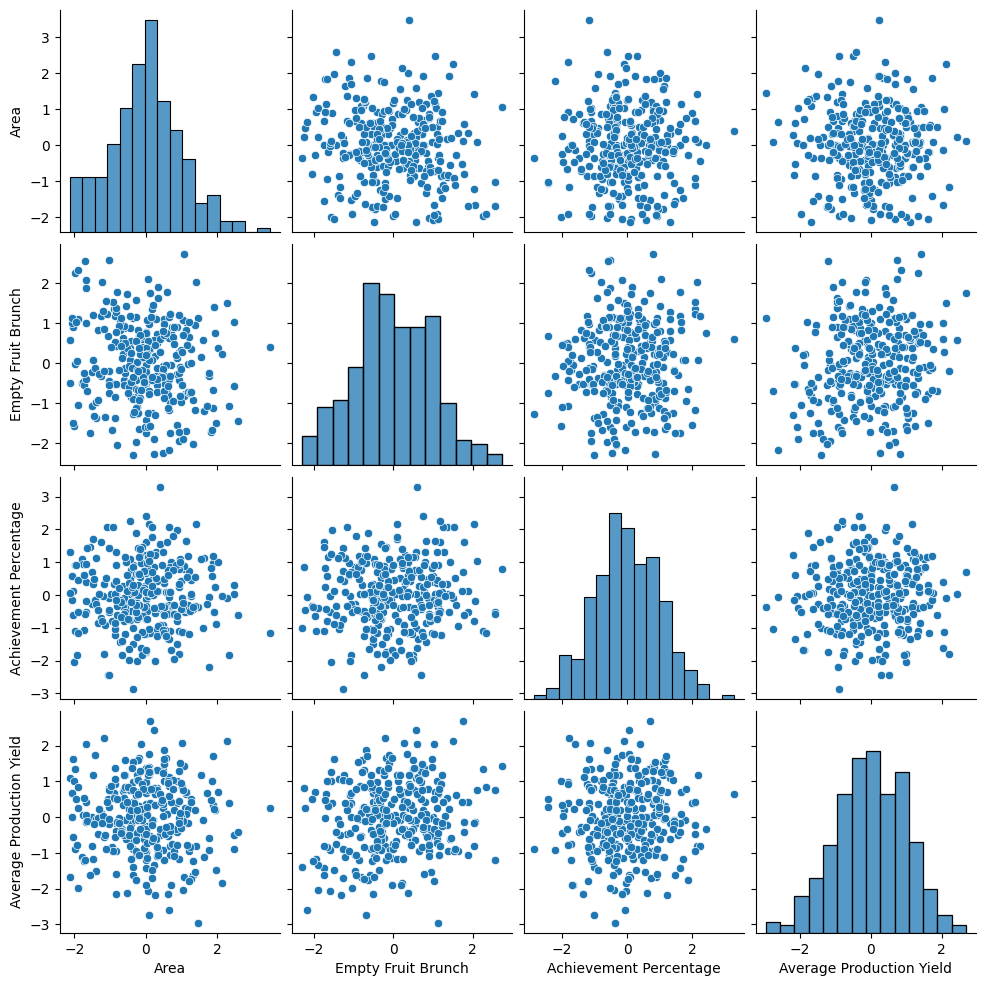

In [23]:
sns.pairplot(pd.DataFrame(X))

# DATA MODELLING

# Elbow method

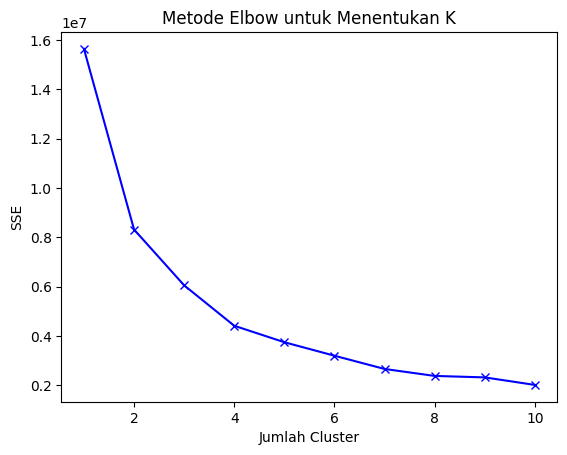

In [30]:
sse = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_run)
    sse.append(kmeans.inertia_)

plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [25]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(df_run)
    distortions.append(km.inertia_)
    # Inertia is the sum of squared distances of samples to their closest cluster center.

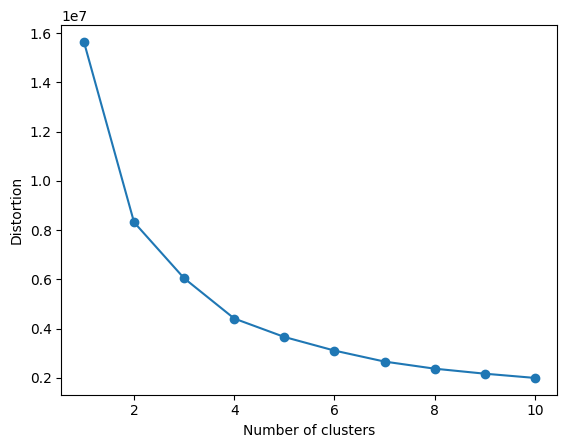

In [26]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.annotate('Best cluster', xy=(3, 1000000), xytext=(3.1, 2000000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method shows that the best K is 2 (probably 3 can be better)

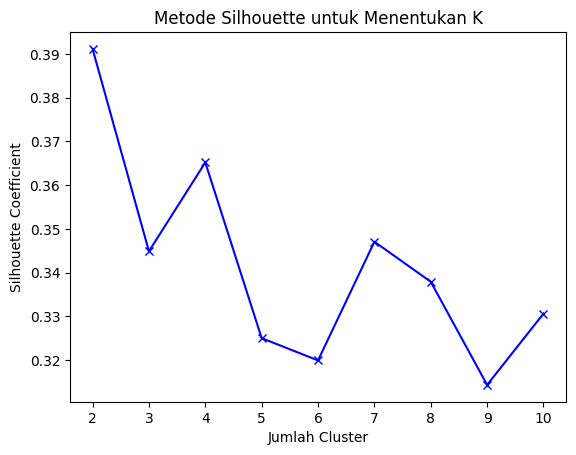

In [27]:
silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_run)
    silhouette_scores.append(silhouette_score(df_run, kmeans.labels_))

plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Coefficient')
plt.title('Metode Silhouette untuk Menentukan K')
plt.show()

In [28]:
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20)
cluster = km.fit_predict(df_run)

In [31]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'centroid pada fitur 3 (sumbu z)':km.cluster_centers_[:,2],
    'centroid pada fitur 3 (sumbu aa)':km.cluster_centers_[:,3],
    'cluster':list(range(3))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),centroid pada fitur 3 (sumbu z),centroid pada fitur 3 (sumbu aa),cluster
0,1.904040,524.463768,0.768634,766.905847,0
1,2.159359,397.017241,0.744752,546.068908,1
2,2.033152,485.400000,0.763880,1006.879006,2


In [32]:
data_with_cluster=df.copy()
data_with_cluster['cluster']=cluster
data_with_cluster

,Division,Block,Area,Empty Fruit Brunch,Achievement Percentage,Average Production Yield,cluster
0,1,1.A,3.000000,810,0.841200,1086.666667,2
1,1,1.B,2.000000,569,0.719400,1000.000000,2
2,1,1.C,2.000000,545,0.830700,1070.000000,2
3,1,1.D,2.000000,480,0.750000,600.000000,1
4,1,1.E,2.000000,465,0.589700,590.000000,1
...,...,...,...,...,...,...,...
311,1,Dalton Rodriguez,1.666169,444,0.793353,958.838049,2
312,1,Margaret Graham,1.206489,579,0.854154,520.541823,1
313,1,Elizabeth Wilson,1.800030,462,0.825852,939.118016,2
314,3,David Perez,1.826639,376,0.827004,615.475662,1


In [33]:
data_with_cluster['cluster'].value_counts()

cluster
0    138
2    120
1     58
Name: count, dtype: int64

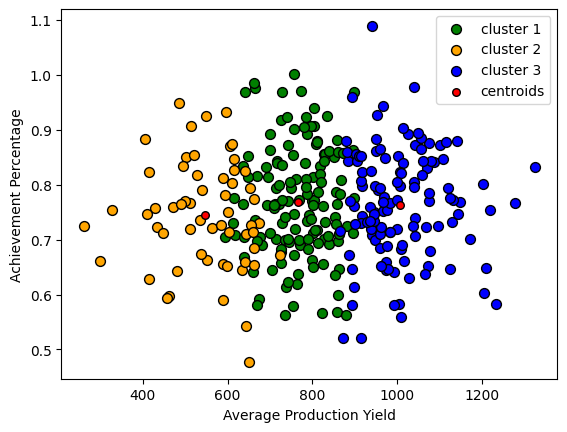

In [39]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 1
plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 0, 'Average Production Yield'], 
    data_with_cluster.loc[data_with_cluster['cluster']==0, 'Achievement Percentage'],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 1, 'Average Production Yield'], 
    data_with_cluster.loc[data_with_cluster['cluster']==1, 'Achievement Percentage'],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 2, 'Average Production Yield'], 
    data_with_cluster.loc[data_with_cluster['cluster']==2, 'Achievement Percentage'],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 3], km.cluster_centers_[:, 2],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.xlabel('Average Production Yield')
plt.ylabel('Achievement Percentage')
plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

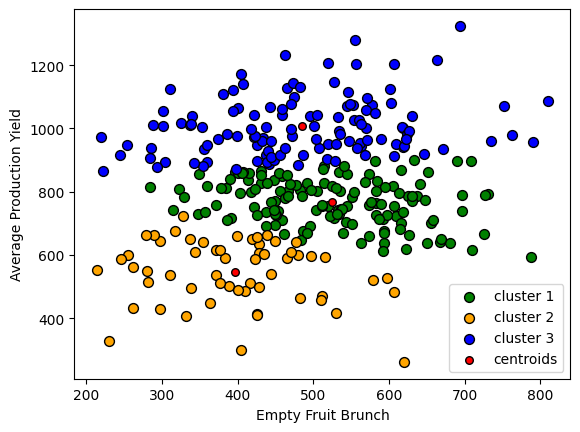

In [40]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 1
plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 0, 'Empty Fruit Brunch'], 
    data_with_cluster.loc[data_with_cluster['cluster']==0, 'Average Production Yield'],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 1, 'Empty Fruit Brunch'], 
    data_with_cluster.loc[data_with_cluster['cluster']==1, 'Average Production Yield'],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_with_cluster.loc[data_with_cluster['cluster'] == 2, 'Empty Fruit Brunch'], 
    data_with_cluster.loc[data_with_cluster['cluster']==2, 'Average Production Yield'],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 1], km.cluster_centers_[:, 3],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.xlabel('Empty Fruit Brunch')
plt.ylabel('Average Production Yield')
plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()